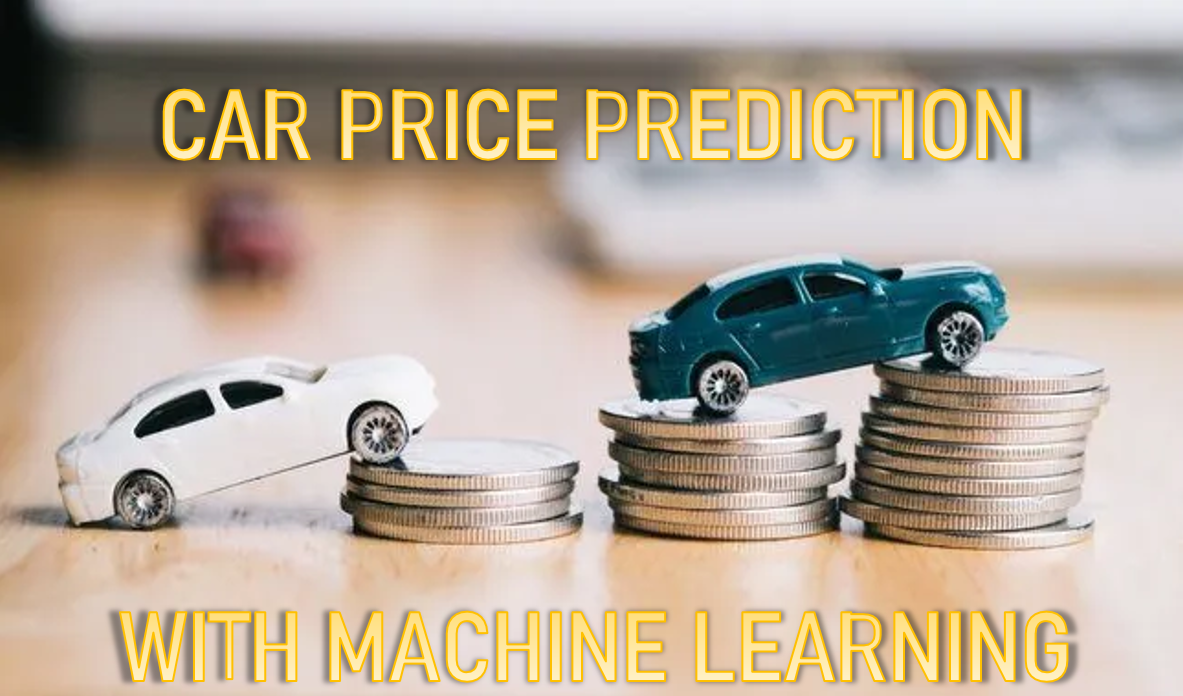

# Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from IPython.display import IFrame
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid", font_scale=1.5)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

# Loading Dataset

In [3]:
data = pd.read_csv("E:\Infobyte\Task-3 Car Price Prediction/CarPrice.csv")
data

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [4]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [5]:
data.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[5 rows x 26 columns]

In [6]:
data.shape

(205, 26)

In [7]:
data.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [8]:
data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [9]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
data.duplicated(subset = ['car_ID']).sum()

0

In [11]:
data.dtypes


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [12]:
data = data.drop(['car_ID'], axis =1)

## Data Analysis

##### Exploring columns

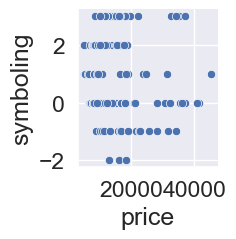

In [13]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data = data)

(array([ 3.,  0., 22.,  0., 67.,  0., 54.,  0., 32., 27.]),
 array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <BarContainer object of 10 artists>)

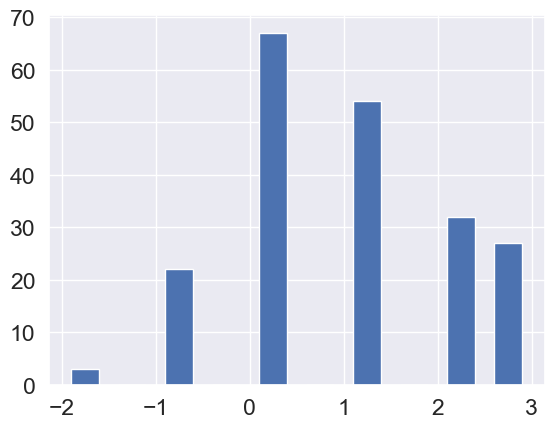

In [14]:
plt.hist(data["symboling"], bins=10, rwidth=0.6)

In [15]:
data['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [16]:
data['car_company'] = data['CarName'].apply(lambda x:x.split(' ')[0])

In [17]:
data['car_company'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: car_company, dtype: object

In [18]:
data = data.drop(['CarName'], axis =1)

In [19]:
data['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [20]:
data['car_company'].replace('toyouta', 'toyota',inplace=True)
data['car_company'].replace('Nissan', 'nissan',inplace=True)
data['car_company'].replace('maxda', 'mazda',inplace=True)
data['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
data['car_company'].replace('vw', 'volkswagen',inplace=True)
data['car_company'].replace('porcshce', 'porsche',inplace=True)

In [21]:
data['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [22]:
data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [23]:
data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [24]:
data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [25]:
data[['doornumber']].head()

doornumber
0        two
1        two
2        two
3       four
4       four

In [26]:
def number_(x):
    return x.map({'four':4, 'two': 2})
    
data['doornumber'] = data[['doornumber']].apply(number_)
data[['doornumber']].head()

doornumber
0           2
1           2
2           2
3           4
4           4

In [27]:
data['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [28]:
data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [29]:
data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [30]:
data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [31]:
data['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: wheelbase, dtype: int64

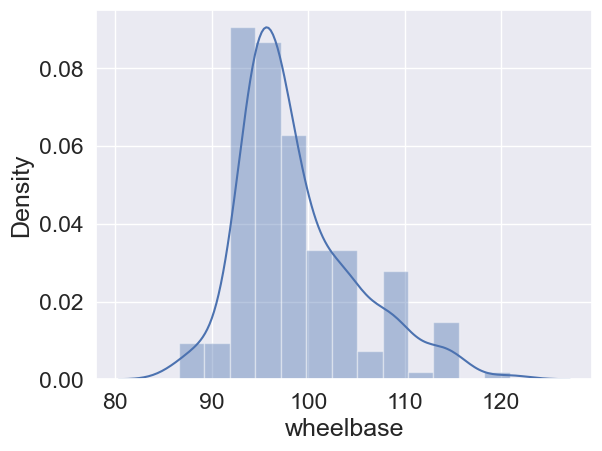

In [32]:
sns.distplot(data['wheelbase'])
plt.show()

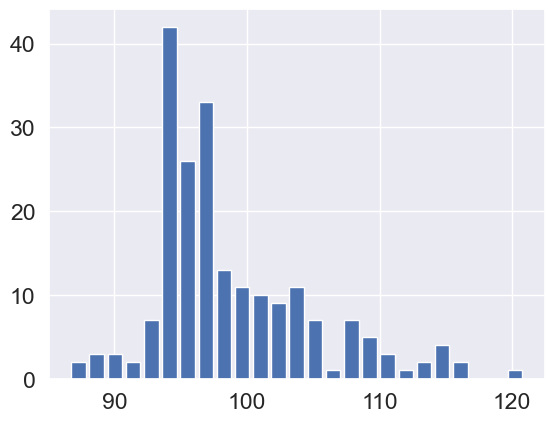

In [33]:
plt.hist(data["wheelbase"], bins=25, rwidth=0.8)
plt.show()

In [34]:
data['carlength'].value_counts().head()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
Name: carlength, dtype: int64

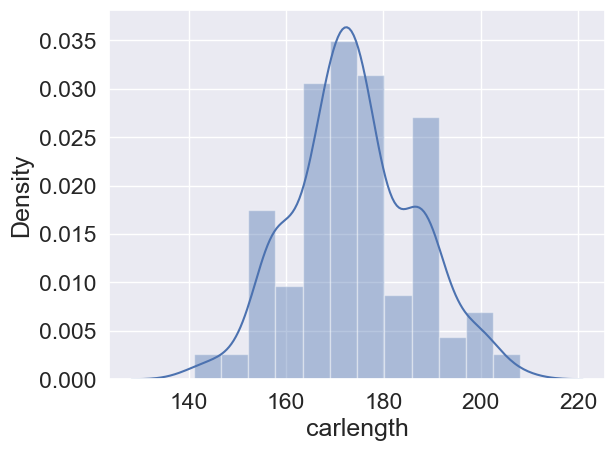

In [35]:
sns.distplot(data['carlength'])
plt.show()

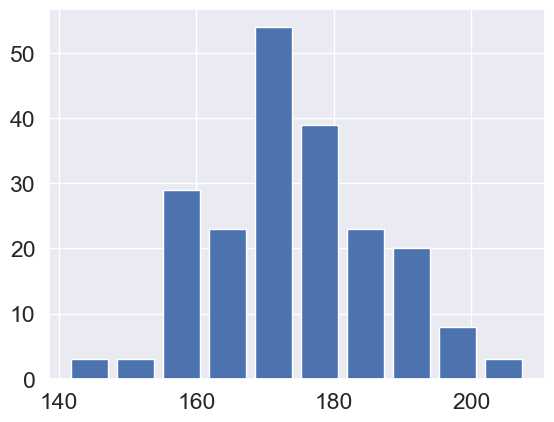

In [36]:
plt.hist(data["carlength"], bins=10, rwidth=0.8)
plt.show()

In [37]:
data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [38]:
data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [39]:
data['cylindernumber'].head()

0    four
1    four
2     six
3    four
4    five
Name: cylindernumber, dtype: object

In [40]:
def convert_number(x):
    return x.map({'four': 4,
                  'six': 6,
                  'five': 5,
                  'eight': 8,
                  'two': 2,
                  'three': 3,
                  'twelve': 12}
                 )

data['cylindernumber'] = data[['cylindernumber']].apply(convert_number)
data['cylindernumber'].head()

0    4
1    4
2    6
3    4
4    5
Name: cylindernumber, dtype: int64

In [41]:
# Re-checking :
data['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

In [42]:
data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [43]:
cars_numeric = data.select_dtypes(include =['int64','float64'])
cars_numeric.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0          3           2       88.6      168.8      64.1       48.8   
1          3           2       88.6      168.8      64.1       48.8   
2          1           2       94.5      171.2      65.5       52.4   
3          2           4       99.8      176.6      66.2       54.3   
4          2           4       99.4      176.6      66.4       54.3   

   curbweight  cylindernumber  enginesize  boreratio  stroke  \
0        2548               4         130       3.47    2.68   
1        2548               4         130       3.47    2.68   
2        2823               6         152       2.68    3.47   
3        2337               4         109       3.19    3.40   
4        2824               5         136       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0               9.0         111     5000       21          27  13495.0  
1               9.0         111     5000       21          27  16500.0  
2               9.0         154     5000       19          26  16500.0  
3              10.0         102     5500       24          30  13950.0  
4               8.0         115     5500       18          22  17450.0

.

<Axes: xlabel='fuelsystem', ylabel='price'>

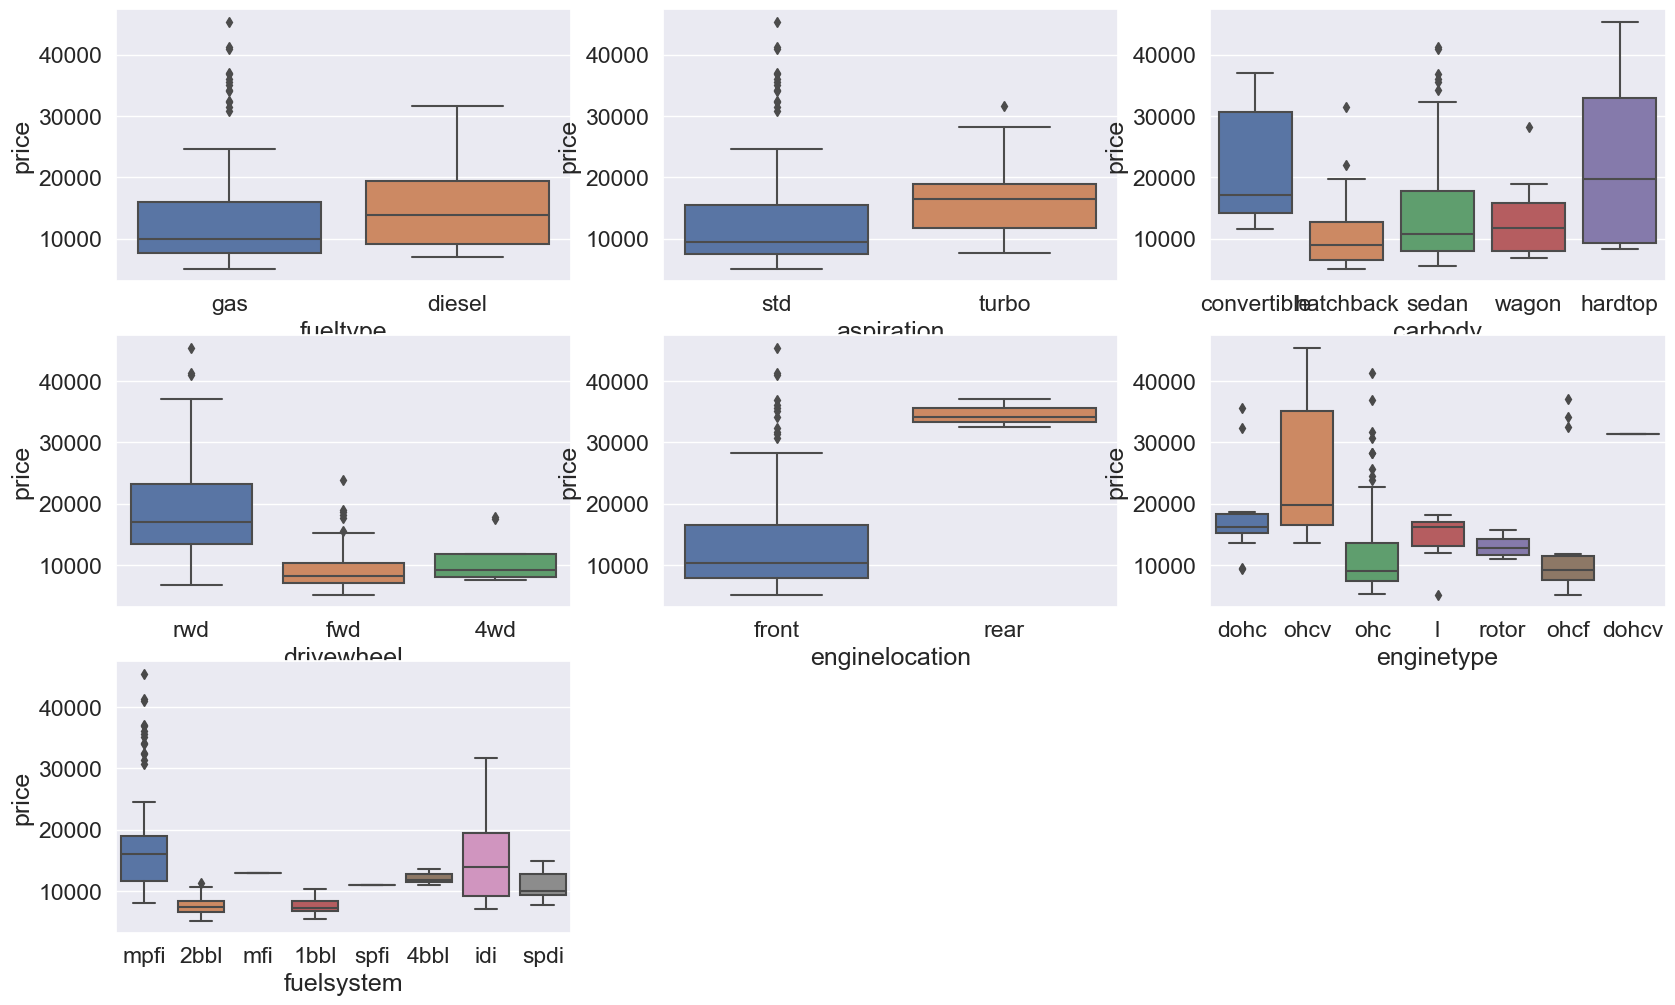

In [44]:
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.boxplot(x='fueltype', y='price', data=data)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.boxplot(x='aspiration', y='price', data=data)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.boxplot(x='carbody', y='price', data=data)

plt.subplot(3, 3, 4)
sns.boxplot(x='drivewheel', y='price', data=data)

plt.subplot(3, 3, 5)
sns.boxplot(x='enginelocation', y='price', data=data)

plt.subplot(3, 3, 6)
sns.boxplot(x='enginetype', y='price', data=data)

plt.subplot(3, 3, 7)
sns.boxplot(x='fuelsystem', y='price', data=data)

<Axes: xlabel='car_company', ylabel='price'>

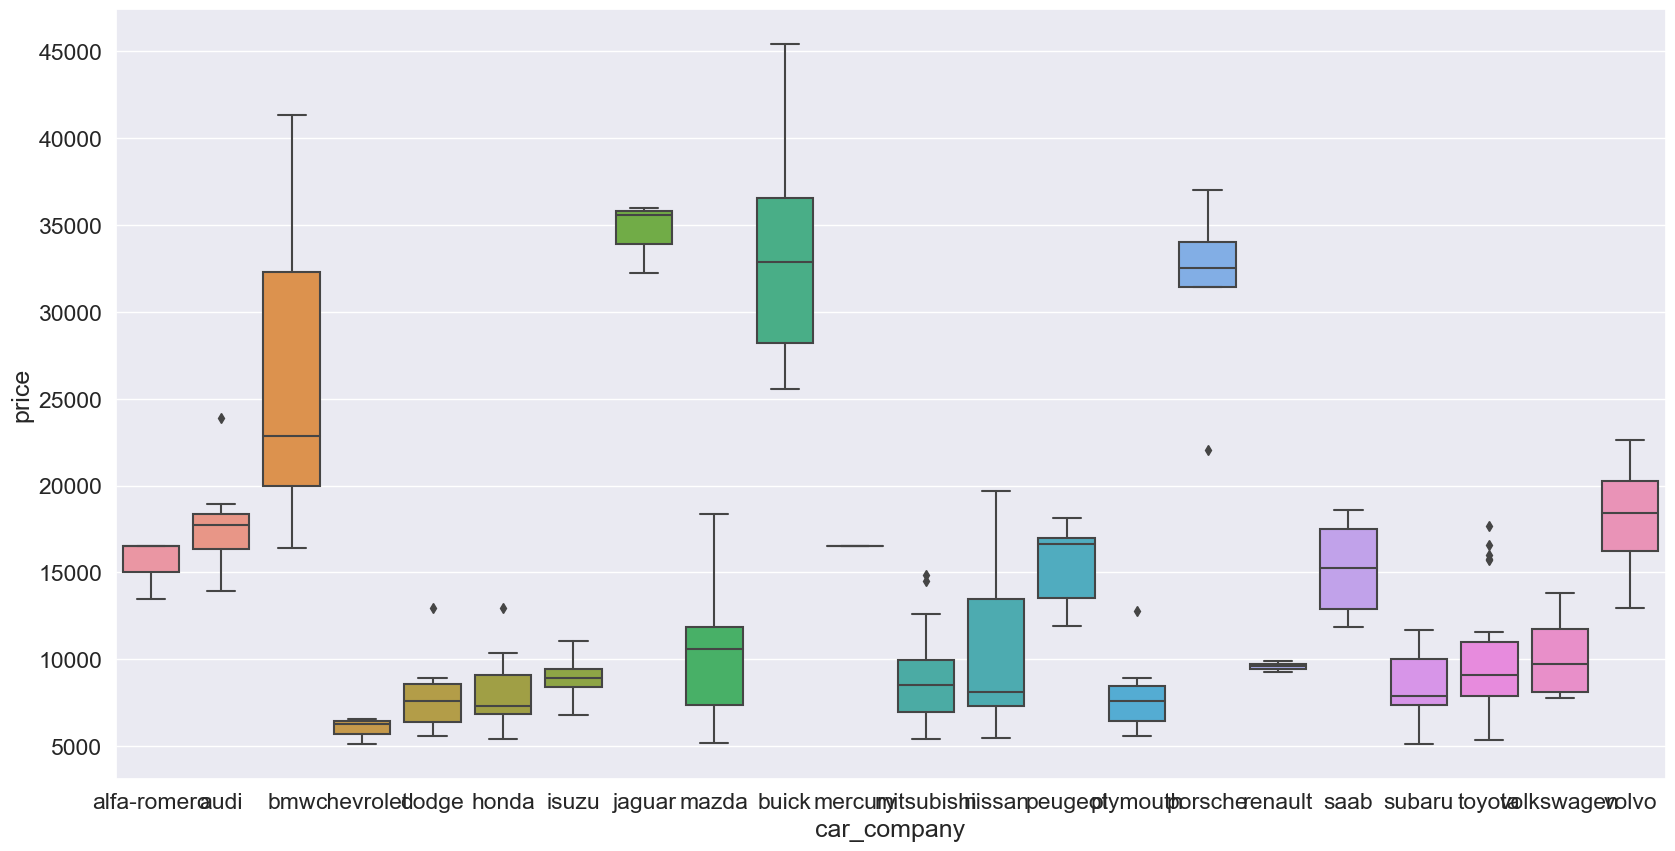

In [45]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='car_company', y='price', data=data)

<Figure size 3000x3000 with 0 Axes>

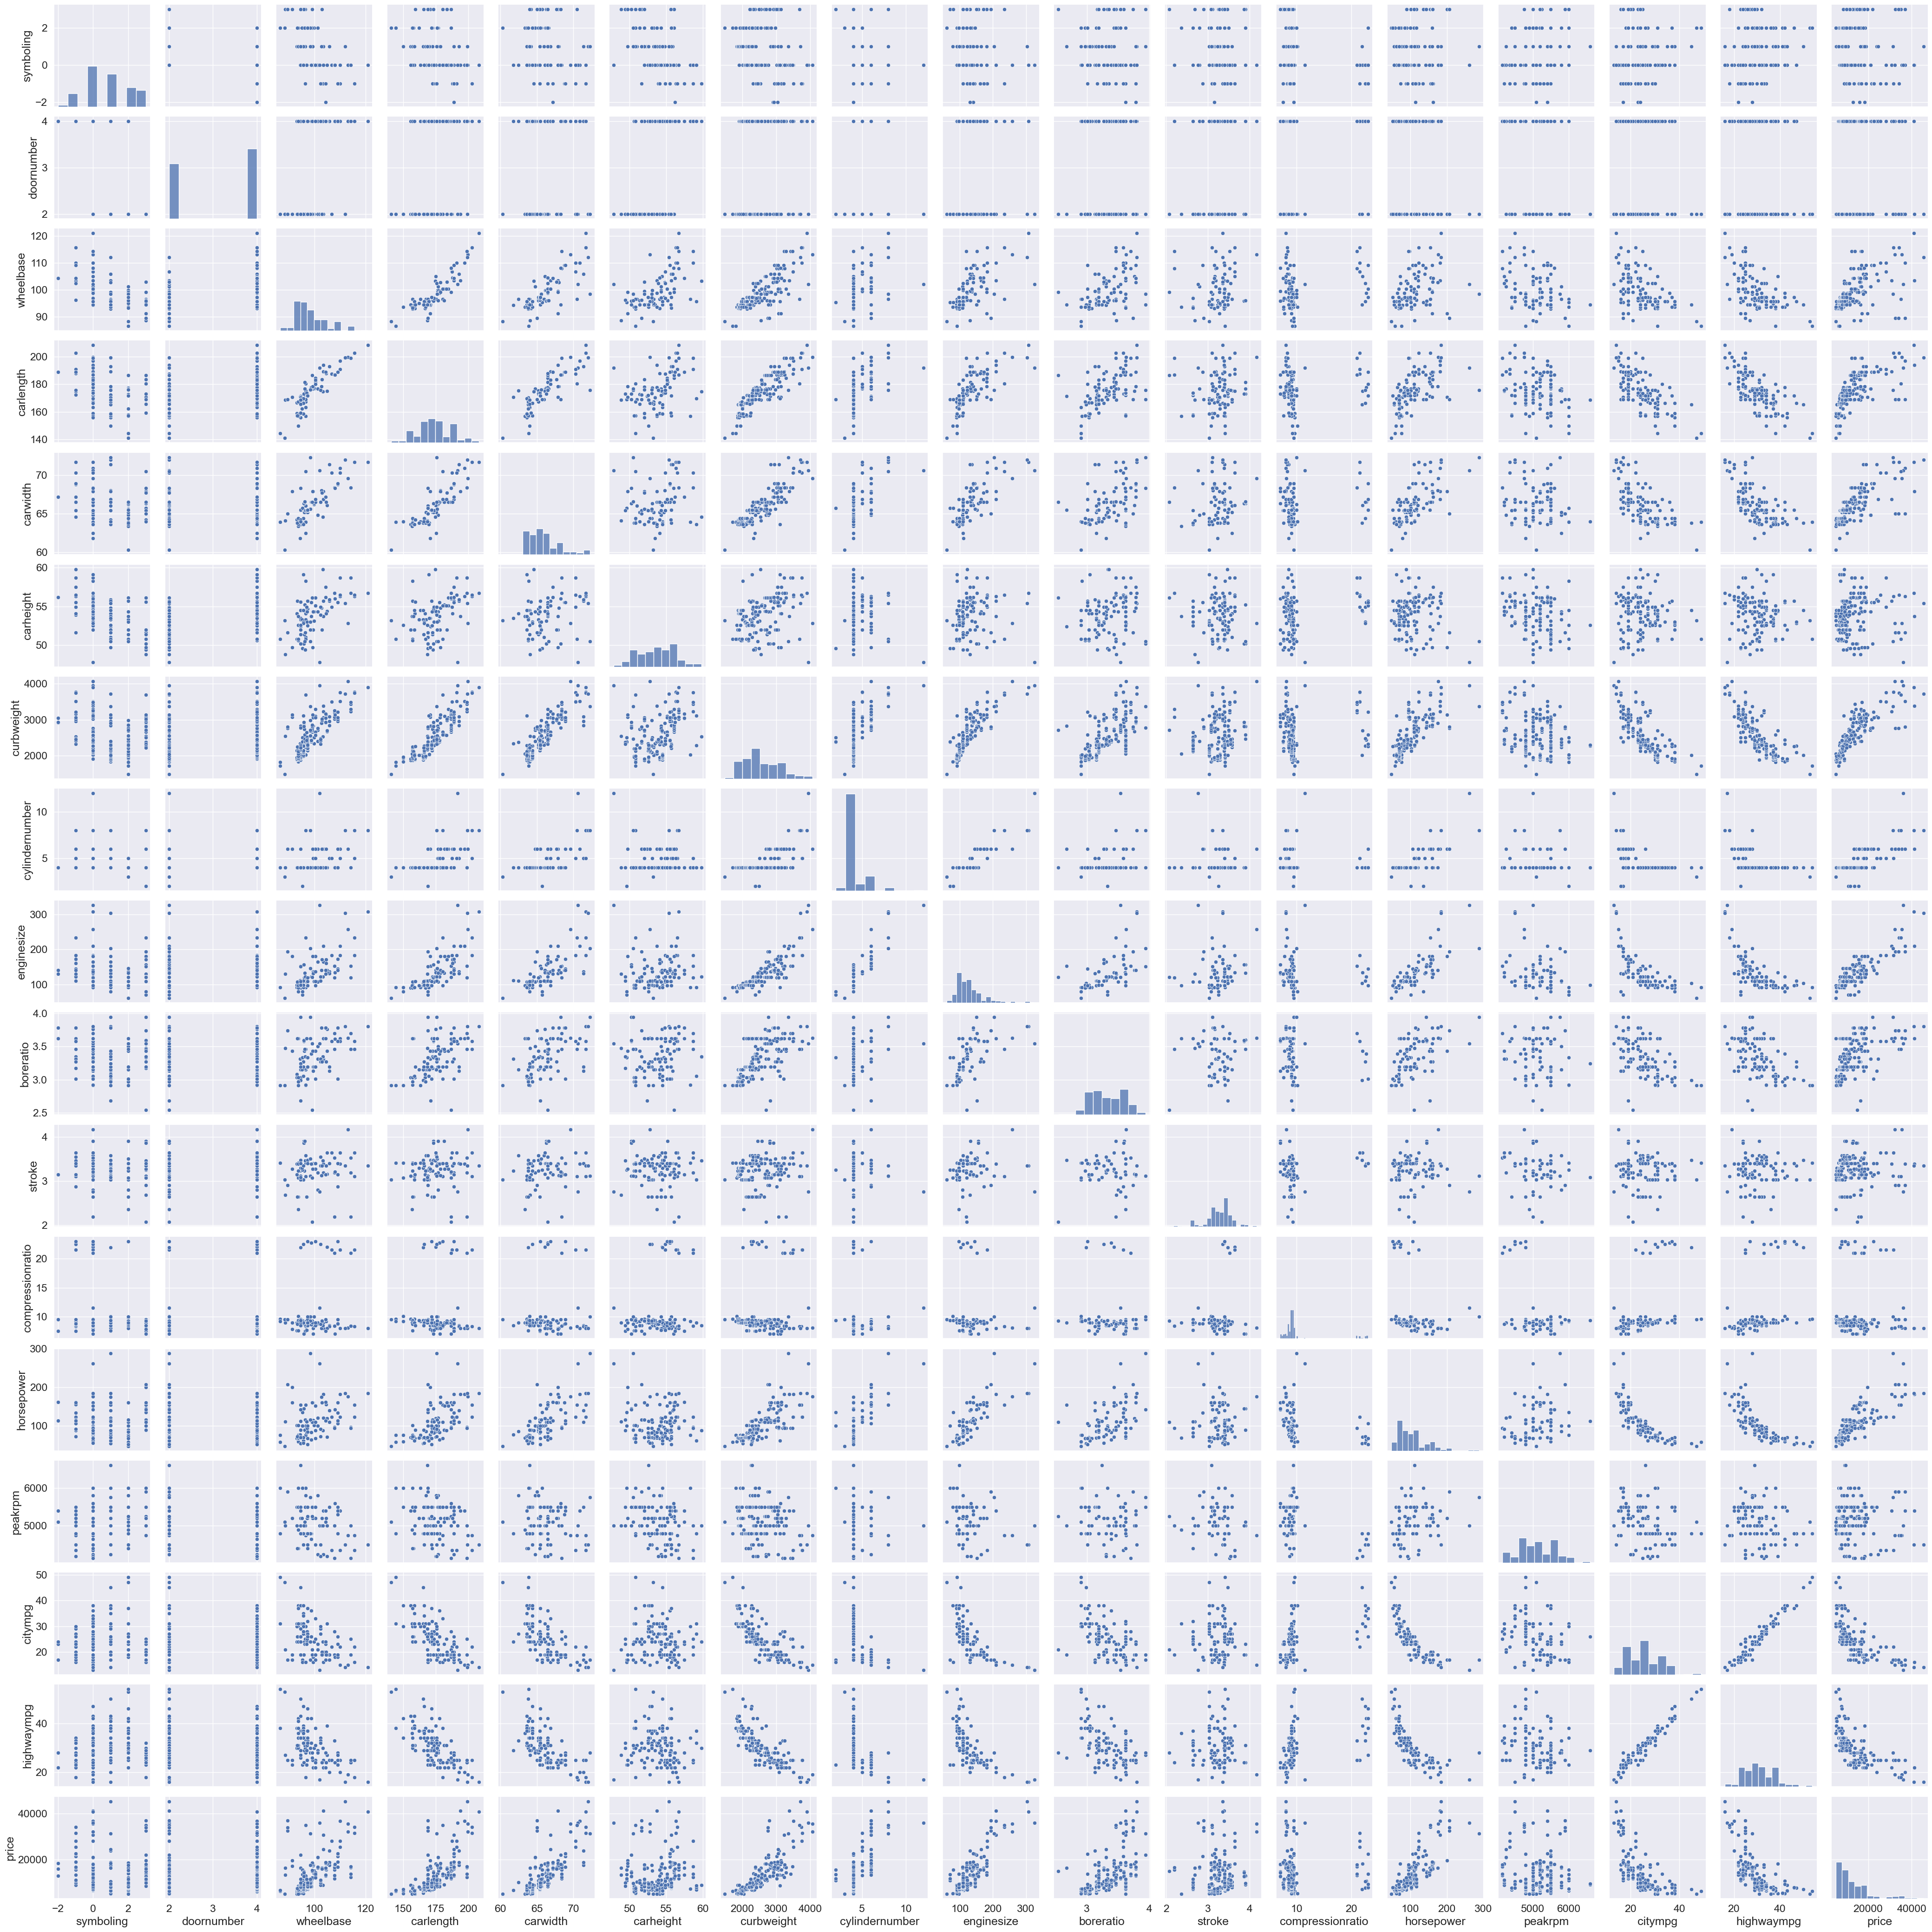

In [46]:
plt.figure(figsize = (30,30))
sns.pairplot(cars_numeric)
plt.show()

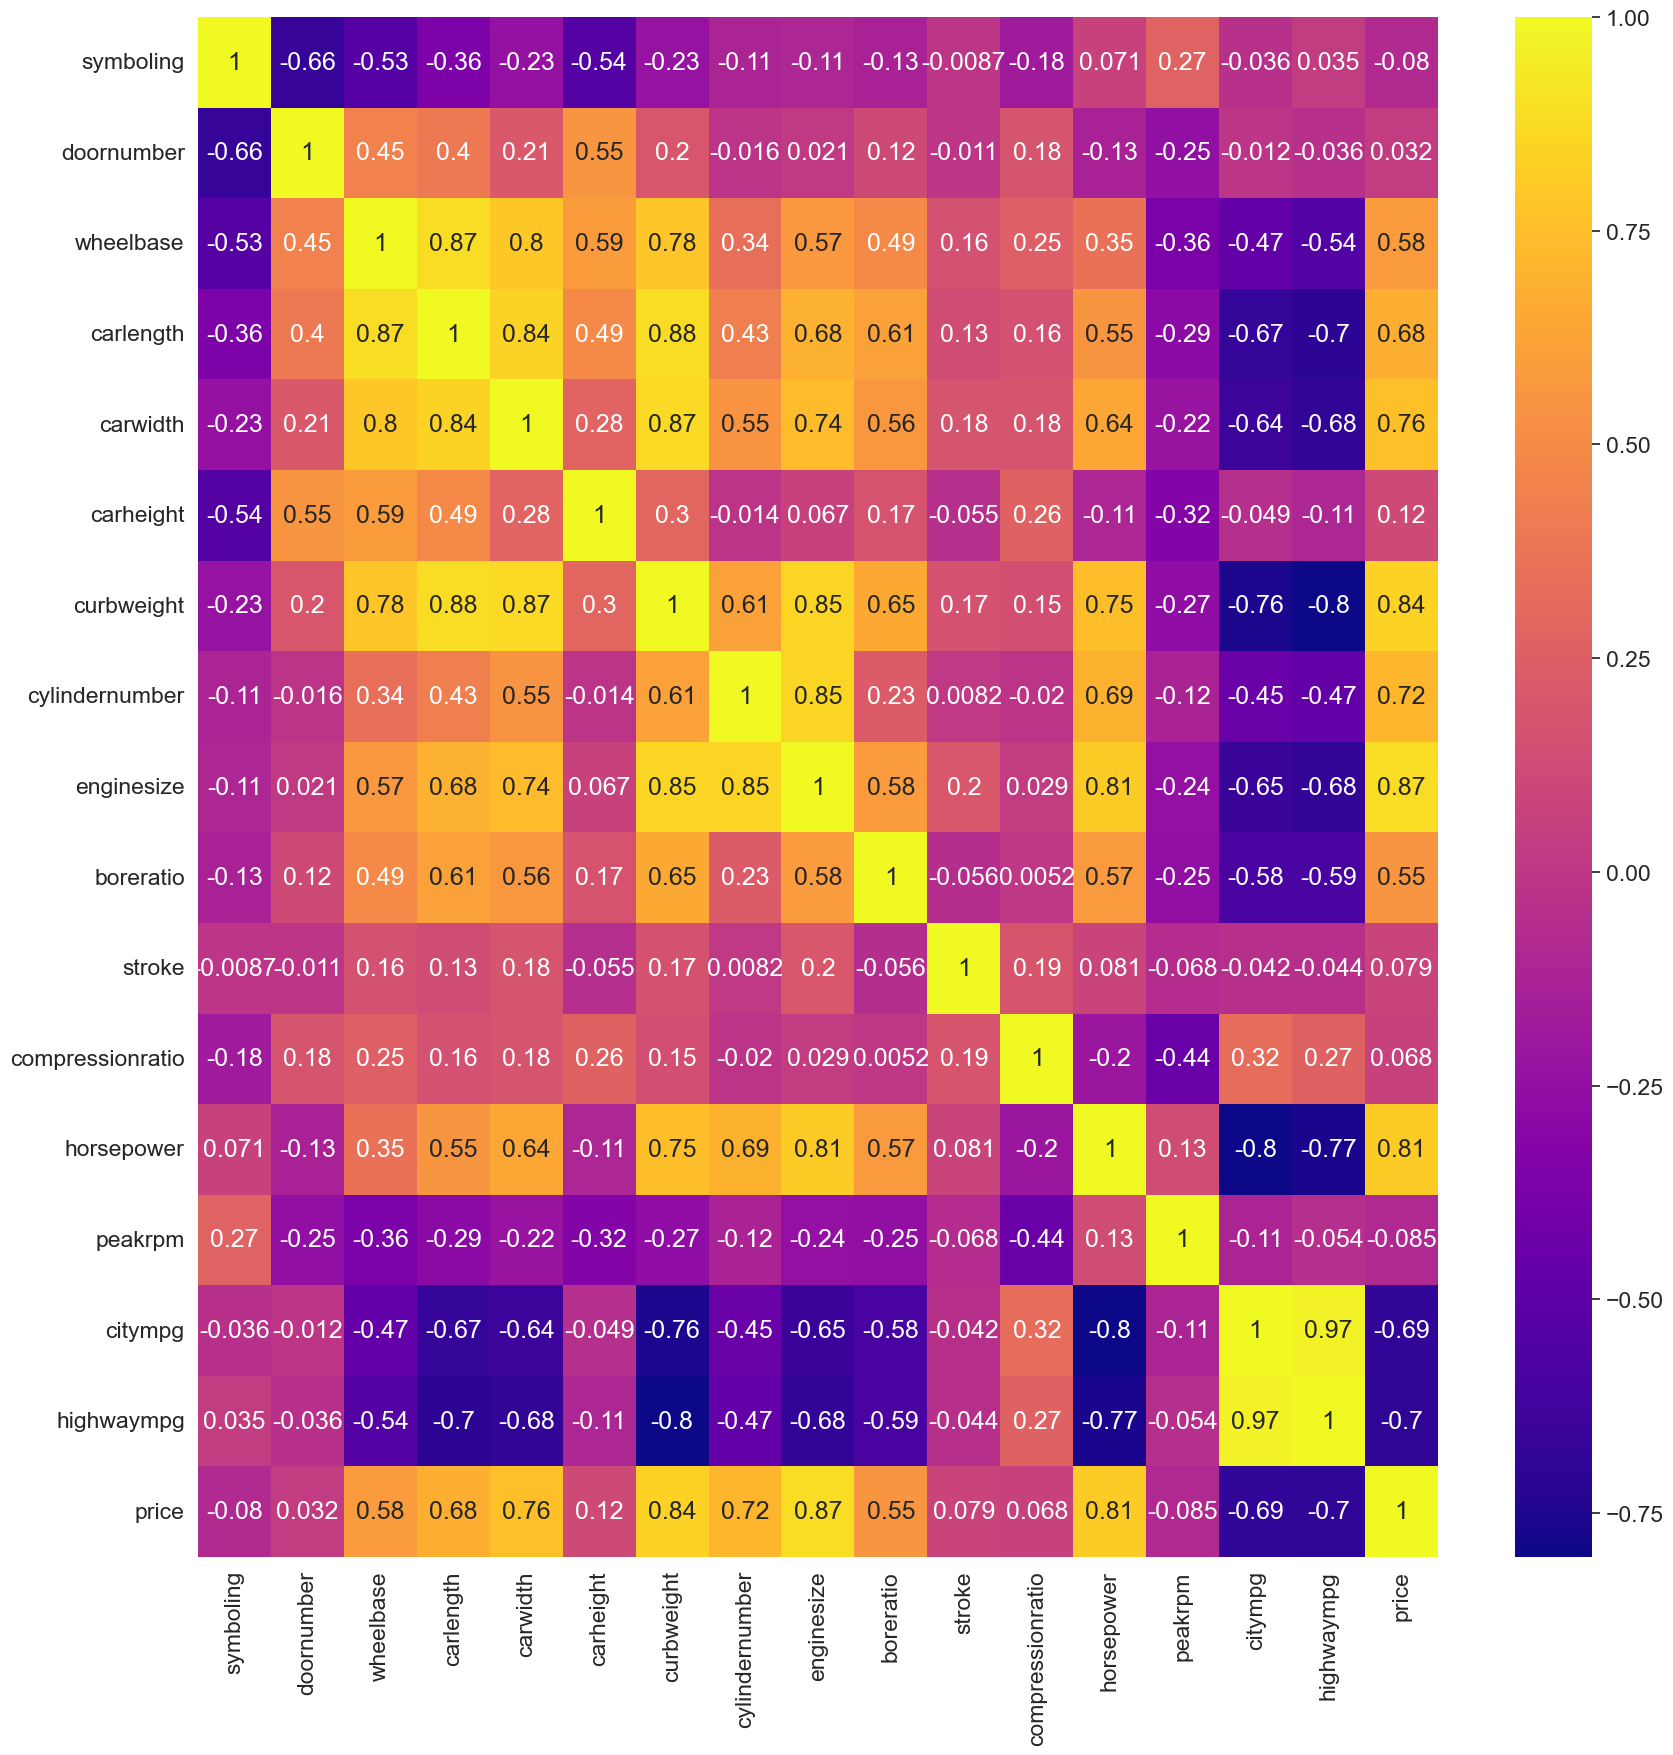

In [47]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True ,cmap = 'plasma')
plt.show()

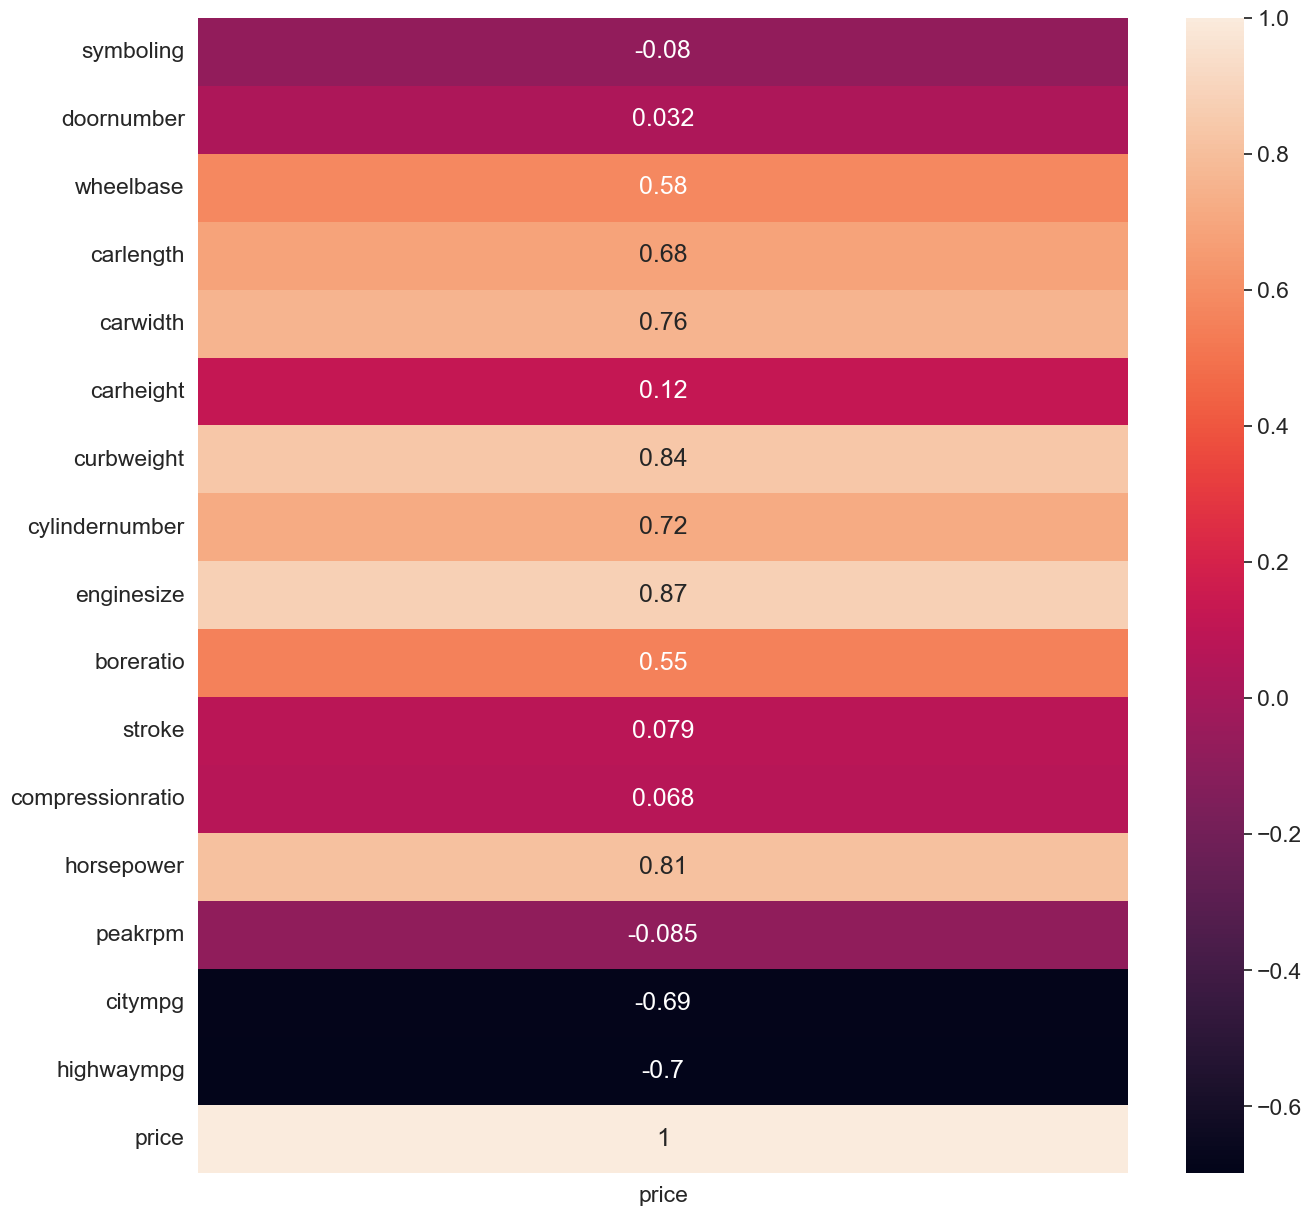

In [48]:
plt.figure(figsize = (15,15)) 
corr = data.corr().iloc[:,-1:] 
sns.heatmap(corr, annot = True) 
plt.show() 

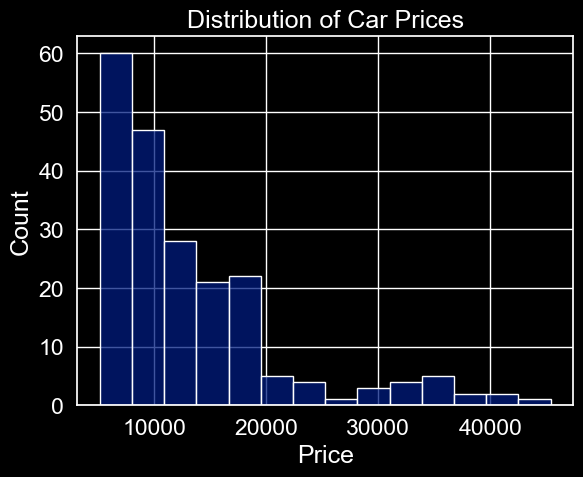

In [49]:
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(data['price'])
plt.title('Distribution of Car Prices', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Count', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# Data Preparation 

In [54]:
# Creating dummies for categorical data :
categorical_cols = data.select_dtypes(include=['object'])
cars_dummies = pd.get_dummies(data[categorical_cols.columns])

In [55]:
car_df = pd.concat([data, cars_dummies], axis=1)

In [56]:
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
                      'enginetype', 'fuelsystem', 'car_company'], axis=1)

In [57]:
car_df.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0          3           2       88.6      168.8      64.1       48.8   
1          3           2       88.6      168.8      64.1       48.8   
2          1           2       94.5      171.2      65.5       52.4   
3          2           4       99.8      176.6      66.2       54.3   
4          2           4       99.4      176.6      66.4       54.3   

   curbweight  cylindernumber  enginesize  boreratio  ...  car_company_nissan  \
0        2548               4         130       3.47  ...                   0   
1        2548               4         130       3.47  ...                   0   
2        2823               6         152       2.68  ...                   0   
3        2337               4         109       3.19  ...                   0   
4        2824               5         136       3.19  ...                   0   

   car_company_peugeot  car_company_plymouth  car_company_porsche  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   

   car_company_renault  car_company_saab  car_company_subaru  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   car_company_toyota  car_company_volkswagen  car_company_volvo  
0                   0                       0                  0  
1                   0                       0                  0  
2                   0                       0                  0  
3                   0                       0                  0  
4                   0                       0                  0  

[5 rows x 68 columns]

In [58]:
car_df=car_df.drop("cylindernumber",axis=1)
car_df.fillna(method="ffill")

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0            3           2       88.6      168.8      64.1       48.8   
1            3           2       88.6      168.8      64.1       48.8   
2            1           2       94.5      171.2      65.5       52.4   
3            2           4       99.8      176.6      66.2       54.3   
4            2           4       99.4      176.6      66.4       54.3   
..         ...         ...        ...        ...       ...        ...   
200         -1           4      109.1      188.8      68.9       55.5   
201         -1           4      109.1      188.8      68.8       55.5   
202         -1           4      109.1      188.8      68.9       55.5   
203         -1           4      109.1      188.8      68.9       55.5   
204         -1           4      109.1      188.8      68.9       55.5   

     curbweight  enginesize  boreratio  stroke  ...  car_company_nissan  \
0          2548         130       3.47    2.68  ...                   0   
1          2548         130       3.47    2.68  ...                   0   
2          2823         152       2.68    3.47  ...                   0   
3          2337         109       3.19    3.40  ...                   0   
4          2824         136       3.19    3.40  ...                   0   
..          ...         ...        ...     ...  ...                 ...   
200        2952         141       3.78    3.15  ...                   0   
201        3049         141       3.78    3.15  ...                   0   
202        3012         173       3.58    2.87  ...                   0   
203        3217         145       3.01    3.40  ...                   0   
204        3062         141       3.78    3.15  ...                   0   

     car_company_peugeot  car_company_plymouth  car_company_porsche  \
0                      0                     0                    0   
1                      0                     0                    0   
2                      0                     0                    0   
3                      0                     0                    0   
4                      0                     0                    0   
..                   ...                   ...                  ...   
200                    0                     0                    0   
201                    0                     0                    0   
202                    0                     0                    0   
203                    0                     0                    0   
204                    0                     0                    0   

     car_company_renault  car_company_saab  car_company_subaru  \
0                      0                 0                   0   
1                      0                 0                   0   
2                      0                 0                   0   
3                      0                 0                   0   
4                      0                 0                   0   
..                   ...               ...                 ...   
200                    0                 0                   0   
201                    0                 0                   0   
202                    0                 0                   0   
203                    0                 0                   0   
204                    0                 0                   0   

     car_company_toyota  car_company_volkswagen  car_company_volvo  
0                     0                       0                  0  
1                     0                       0                  0  
2                     0                       0                  0  
3                     0                       0                  0  
4                     0                       0                  0  
..                  ...                     ...                ...  
200                   0                       0                  1  
201                   0      

In [84]:
#Spliting the data into test and train :
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [85]:
df_train.shape

(143, 67)

In [86]:
df_test.shape

(62, 67)

In [87]:
#Rescaling
cars_numeric.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [88]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight',  'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [89]:
scaler = StandardScaler()

In [90]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [91]:
df_train.describe()

symboling    doornumber     wheelbase     carlength      carwidth  \
count  1.430000e+02  1.430000e+02  1.430000e+02  1.430000e+02  1.430000e+02   
mean   3.726623e-17  9.937661e-17  1.565182e-15  1.614870e-16 -4.074441e-15   
std    1.003515e+00  1.003515e+00  1.003515e+00  1.003515e+00  1.003515e+00   
min   -2.347020e+00 -1.126872e+00 -2.006930e+00 -2.574223e+00 -2.510760e+00   
25%   -6.689008e-01 -1.126872e+00 -6.771770e-01 -6.186702e-01 -8.565171e-01   
50%    1.701590e-01  8.874120e-01 -3.405307e-01 -1.128552e-01 -1.993522e-01   
75%    1.701590e-01  8.874120e-01  4.505882e-01  7.076008e-01  4.804736e-01   
max    1.848278e+00  8.874120e-01  2.874442e+00  2.324616e+00  2.927846e+00   

          carheight    curbweight    enginesize     boreratio        stroke  \
count  1.430000e+02  1.430000e+02  1.430000e+02  1.430000e+02  1.430000e+02   
mean   5.341493e-16 -1.614870e-16 -6.211038e-17 -1.062087e-15  2.141255e-15   
std    1.003515e+00  1.003515e+00  1.003515e+00  1.003515e+00  1.003515e+00   
min   -2.371619e+00 -1.937401e+00 -1.566427e+00 -2.412359e+00 -3.403827e+00   
25%   -7.222984e-01 -7.711028e-01 -6.847340e-01 -9.320600e-01 -4.497569e-01   
50%    6.112865e-02 -2.478347e-01 -3.663447e-01  9.948427e-03  6.399437e-02   
75%    7.414732e-01  7.203955e-01  3.928914e-01  8.942829e-01  4.814173e-01   
max    2.287711e+00  2.812547e+00  4.923816e+00  2.432256e+00  2.953845e+00   

       ...  car_company_nissan  car_company_peugeot  car_company_plymouth  \
count  ...          143.000000           143.000000            143.000000   
mean   ...            0.097902             0.055944              0.027972   
std    ...            0.298227             0.230621              0.165472   
min    ...            0.000000             0.000000              0.000000   
25%    ...            0.000000             0.000000              0.000000   
50%    ...            0.000000             0.000000              0.000000   
75%    ...            0.000000             0.000000              0.000000   
max    ...            1.000000             1.000000              1.000000   

       car_company_porsche  car_company_renault  car_company_saab  \
count           143.000000           143.000000        143.000000   
mean              0.020979             0.013986          0.020979   
std               0.143818             0.117845          0.143818   
min               0.000000             0.000000          0.000000   
25%               0.000000             0.000000          0.000000   
50%               0.000000             0.000000          0.000000   
75%               0.000000             0.000000          0.000000   
max               1.000000             1.000000          1.000000   

       car_company_subaru  car_company_toyota  car_company_volkswagen  \
count          143.000000          143.000000              143.000000   
mean             0.076923            0.139860                0.048951   
std              0.267406            0.348061                0.216524   
min              0.000000            0.000000                0.000000   
25%              0.000000            0.000000                0.000000   
50%              0.000000            0.000000                0.000000   
75%              0.000000            0.000000                0.000000   
max              1.000000            1.000000                1.000000   

       car_company_volvo  
count         143.000000  
mean            0.041958  
std             0.201198  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 67 columns]

# Model Building

### Model Building using Linear Regression

In [92]:
y_train = df_train.pop('price')
X_train = df_train

In [93]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [94]:
model.intercept_

7389431144736.072

In [95]:
model.coef_

array([ 2.04990680e-03,  2.73797097e-02,  2.40246719e-01, -1.22489011e-01,
        2.11122495e-01, -1.66124410e-01,  3.34551667e-01,  6.84660053e-01,
       -1.53145768e-01, -6.17758292e-02, -7.22528027e-01, -1.76752673e-01,
        1.97995104e-01,  9.33487237e-02,  8.99945561e-02, -4.16667882e+12,
       -3.15318915e+12, -6.17178527e+11, -6.17178527e+11, -2.51580407e+12,
       -2.51580407e+12, -2.51580407e+12, -2.51580407e+12, -2.51580407e+12,
        1.41485578e+12,  1.41485578e+12,  1.41485578e+12,  4.93080925e+11,
        6.07088487e+11, -2.81942016e+12, -2.81942016e+12, -2.81942016e+12,
       -2.81942016e+12, -2.93342772e+12, -2.81942016e+12, -2.81942016e+12,
        2.25729121e+11,  2.25729121e+11,  2.25729121e+11,  1.23921879e+12,
        4.27004370e+09,  2.25729121e+11,  2.25729121e+11, -1.55670331e+09,
       -4.17505059e+11, -4.17505059e+11, -4.17505059e+11, -4.17505059e+11,
       -4.17505059e+11, -4.17505059e+11, -4.17505059e+11, -4.17505059e+11,
       -4.17505059e+11, -

In [96]:
df_test[col_list] = scaler.transform(df_test[col_list])
y_test = df_test.pop('price')
X_test = df_test

In [97]:
y_pred = model.predict(X_test)

#### Evaluation

In [99]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

In [100]:
mse

4.4357006887907335e+21

In [101]:
r_squ = r2_score(y_test,y_pred)
r_squ

-3.83361485766899e+21

### Model building using RFE 

In [102]:
LRmodel = LinearRegression()
rfe = RFE(LRmodel, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

In [103]:
rfe.n_features_

5

In [104]:
list(zip(X_train.columns, rfe.support_ ,rfe.ranking_))

[('symboling', False, 61),
 ('doornumber', False, 60),
 ('wheelbase', False, 36),
 ('carlength', False, 38),
 ('carwidth', False, 5),
 ('carheight', False, 37),
 ('curbweight', False, 16),
 ('enginesize', False, 13),
 ('boreratio', False, 34),
 ('stroke', False, 59),
 ('compressionratio', False, 20),
 ('horsepower', False, 43),
 ('peakrpm', False, 31),
 ('citympg', False, 28),
 ('highwaympg', False, 46),
 ('fueltype_diesel', False, 19),
 ('fueltype_gas', False, 17),
 ('aspiration_std', False, 15),
 ('aspiration_turbo', False, 40),
 ('carbody_convertible', False, 7),
 ('carbody_hardtop', False, 44),
 ('carbody_hatchback', False, 39),
 ('carbody_sedan', False, 45),
 ('carbody_wagon', False, 53),
 ('drivewheel_4wd', False, 56),
 ('drivewheel_fwd', False, 47),
 ('drivewheel_rwd', False, 49),
 ('enginelocation_front', True, 1),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohc', False, 24),
 ('enginetype_dohcv', False, 25),
 ('enginetype_l', False, 3),
 ('enginetype_ohc', False, 22),
 (

In [105]:
cols = X_train.columns[rfe.support_]
cols

Index(['enginelocation_front', 'enginelocation_rear', 'car_company_bmw',
       'car_company_buick', 'car_company_jaguar'],
      dtype='object')

#### Model 1

In [106]:
X_test2 = X_test[cols]                                                                                                                            
y_pred2 = rfe.predict(X_test)

In [108]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred2)
print("The Mean Squares Error is: ", mse)
print("The R-2 score is: ", r2_score(y_test, y_pred2))
print("The previous Mean Squares Error was: 4.4357006887907335e+21")
print("The previous R-2 score was: -3.83361485766899e+21")

The Mean Squares Error is:  0.3522655268808264
The R-2 score is:  0.6955497107576272
The previous Mean Squares Error was: 4.4357006887907335e+21
The previous R-2 score was: -3.83361485766899e+21


#### Model 2

In [109]:
LRmodel = LinearRegression()
rfe = RFE(LRmodel, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)
rfe.n_features_
y_pred_ = rfe.predict(X_test)


mse = sklearn.metrics.mean_squared_error(y_test, y_pred_)
print("The Mean Squares Error is: ", mse)
print("The R-2 score is: ", r2_score(y_test, y_pred_))

The Mean Squares Error is:  0.15969736652255329
The R-2 score is:  0.8619793714714383


In [110]:
cols = X_train.columns[rfe.support_]
cols

Index(['carwidth', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_l', 'car_company_alfa-romero', 'car_company_bmw',
       'car_company_buick', 'car_company_jaguar', 'car_company_peugeot',
       'car_company_porsche'],
      dtype='object')

In [111]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 56),
 ('doornumber', False, 55),
 ('wheelbase', False, 31),
 ('carlength', False, 33),
 ('carwidth', True, 1),
 ('carheight', False, 32),
 ('curbweight', False, 11),
 ('enginesize', False, 8),
 ('boreratio', False, 29),
 ('stroke', False, 54),
 ('compressionratio', False, 15),
 ('horsepower', False, 38),
 ('peakrpm', False, 26),
 ('citympg', False, 23),
 ('highwaympg', False, 41),
 ('fueltype_diesel', False, 14),
 ('fueltype_gas', False, 12),
 ('aspiration_std', False, 10),
 ('aspiration_turbo', False, 35),
 ('carbody_convertible', False, 2),
 ('carbody_hardtop', False, 39),
 ('carbody_hatchback', False, 34),
 ('carbody_sedan', False, 40),
 ('carbody_wagon', False, 48),
 ('drivewheel_4wd', False, 51),
 ('drivewheel_fwd', False, 42),
 ('drivewheel_rwd', False, 44),
 ('enginelocation_front', True, 1),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohc', False, 19),
 ('enginetype_dohcv', False, 20),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 17),
 ('en

In [112]:
[value for index,value in enumerate(list(zip(X_train.columns,rfe.support_,rfe.ranking_))) if value[2] == True]

[('carwidth', True, 1),
 ('enginelocation_front', True, 1),
 ('enginelocation_rear', True, 1),
 ('enginetype_l', True, 1),
 ('car_company_alfa-romero', True, 1),
 ('car_company_bmw', True, 1),
 ('car_company_buick', True, 1),
 ('car_company_jaguar', True, 1),
 ('car_company_peugeot', True, 1),
 ('car_company_porsche', True, 1)]

In [118]:
from sklearn.metrics import r2_score
yhat = rfe.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))

print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - y_test) ** 2)) 

print("R2-score: %.2f" % r2_score(y_test, yhat))

Mean absolute error: 0.28
Residual sum of squares (MSE): 0.16
R2-score: 0.86


##### The variables that are significant in predicting the price of a car :

#### 1. carwidth
#### 2. enginelocation_front
#### 3. enginelocation_rear
#### 4.  enginetype_l
#### 5. car_company_alfa-romero
#### 6. car_company_bmw
#### 7. car_company_buick
#### 8. car_company_jaguar
#### 9. car_company_peugeot
#### 10. car_company_porsche